## Announcements

- Exam 1 Grades
    - **No grade?** -- email me your name, WiscID, name in Canvas (if different), where you took the exam
    - **Grade dispute?**
          - 2 general questions answer E will also be marked as correct:
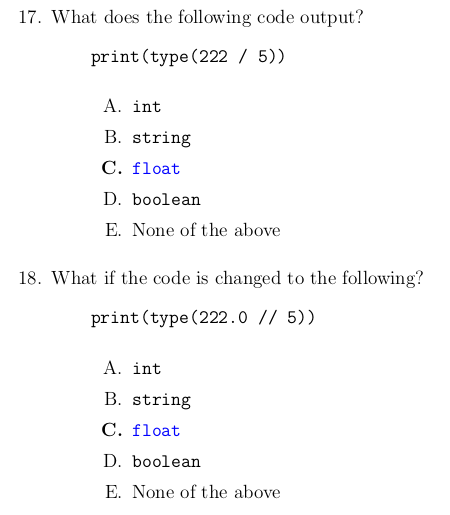

  - **Other exam grade disputes?** -- email me the question and why you think your answer should be considered correct.

In [1]:
import csv
import json # today's topic!

In [3]:
# Read in the csv survey data data and the cell function.

# source:  Automate the Boring Stuff with Python
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

cs220_csv = process_csv('cs220_survey_data.csv')
cs220_header = cs220_csv[0]
cs220_data = cs220_csv[1:]

def cell(row_idx, col_name):
    col_idx = cs220_header.index(col_name)
    val = cs220_data[row_idx][col_idx]
    if val == "":
        return None
    elif col_name == "Age":
        if "." in val:
            return None
        return int(val)
    elif col_name == 'Latitude' or col_name == 'Longitude':
        return float(val)
    else:
        return val


## Warmup

In [ ]:
# Warmup 1: Put survey_data into buckets by lecture
#   Make a dictionary of lists
#   Key is the lecture
#   Value is the list of students, where each student is a dictionary

lecture_dict = {}
for i in range(len(cs220_data)):
    current_student = cs220_data[i]
    current_lecture = cell(i, 'Lecture')
    pass
lecture_dict

In [ ]:
# Warmup 2: Find the average, min, and max age for your lecture

people_age = []
for person in lecture_dict[???]:
    ???

In [ ]:
# Warmup 3: Make a dictionary of each lecture's average age
# The key is the lecture name
# The value is the average age

lec_age_dict = {}
for lec in lecture_dict:
    ???

In [ ]:
# Warmup 4: Same thing as before except...
# The key is the lecture name
# The value is a dictionary (nested dictionary!)
#  ... with keys 'avg', 'min', and 'max'

lec_age_dict = {}
for lec in lecture_dict:
    ???

# JSON Format

## Reading

- [Sweigart Ch 16](https://automatetheboringstuff.com/2e/chapter16/)


## Learning Objectives
After this lecture you will be able to...
- Interpret JSON formatted data and recognize differences between JSON and Python
- Deserialize data from JSON for use in Python programs (read)
- Serialize data into JSON for long term storage (write) 

Let's look at [lecture slides](./19_JSON.pdf).  Pay particular attention to:

- JSON format comparing *dict of dicts* to *JSON files*
- JSON origin and acronymn
- Minor JavaScript vs. Python differences

In [13]:
# Deserialize
def read_json(path):
    with open(path, encoding="utf-8") as f: # f is a variable 
        return json.load(f)                 # f represents a reference the JSON file
    
# Serialize
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

first, let's take a look at the file `score_history.json`, read it in using `read_json()` and print out the data.

In [14]:
# now let's read it in and investigate the data
scores_dict = read_json('score_history.json')
# print(type(scores_dict))
# print(scores_dict.keys())
# print(scores_dict['bob'])
# print(scores_dict)

# scores_dict['cole'] = [50.0, 20.0]
print(scores_dict)

{'bob': [20.0, 10.0], 'alice': [30.0, 20.0], 'meena': [100.0, 10.0]}


In [ ]:
# Let's practice writing to a JSON file
# when I'm testing code, I like to name my output file differently from my input file
# so that I don't accidentally erase or overwrite my data
write_json('score_history2.json', scores_dict)  

### We can make JSON files in many varied ways
### This makes a list of dictionaries

In [ ]:
# Code from last lecture, 
# reads in the survey data into a list of dicts
table_dict_list = []
for i in range(len(cs220_data)):
    row = cs220_data[i]
    row_dict = {}
    for item in cs220_header: # iterate through each column name
        row_dict[item] = row[cs220_header.index(item)] # find the value in the row using .index
    
    # add row_dict to table_dict_list
    table_dict_list.append(row_dict)
    
table_dict_list[:3] # what is this? -- look at first 3 rows

In [15]:
# Let's write this list of dictionaries into a JSON file
write_json('cs220_as_json_list.json', table_dict_list)  

In [ ]:
# Verify:  can you find this file in your directory?

In [ ]:
# let's write our original dictionary of lists - buckets into a JSON file
# NOTE: YOU MUST DO WARMUP TO HAVE THE lecture_dict VARIABLE
write_json('cs220_as_json_dict.json', lecture_dict)  

In [ ]:
# Verify: can you find this file in your directory? 

### Many Web Sites have APIs that allow you to get their data

#### cs571.org

In [ ]:
# Read cs571.json data
cs571_data = ...
cs571_data

In [ ]:
# What are each of the messages?


In [ ]:
# Who are the unique posters?


#### Kiva.com Micro-lending site

In [ ]:
# Take a look at kiva.json

# read it into a dictionary
kiva_dict = read_json('kiva.json')
kiva_dict

In [ ]:
# Plumbing the data
loan_list = ??? # this gives us a list of dicts
loan_list

In [ ]:
# what can we learn from this data?
for loan_dict in loan_list:
    print(type(loan_dict))
    for key in loan_dict:
        print(key)

In [ ]:
# print out all the names
for loan_dict in loan_list:
    ???

In [ ]:
# print out the total amount to loan
for loan_dict in loan_list:
    ???

In [ ]:
# print out the min, max, and avg loan amounts
loan_amounts = []
for loan_dict in loan_list:
    ???

In [ ]:
# print out all the country names
for loan_dict in loan_list:
    ???

In [ ]:
# more complex APIs...

# Most require you to sign up and get a key:

# https://developer.nytimes.com/apis
# https://developer.spotify.com/documentation/web-api
# https://developer.twitter.com/apitools/downloader

# Some do not:
# https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-route-patterns/api
# specific route: https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA_TRANS/MapServer/19/query?where=trips_routes_route_id%20%3D%20'80'&outFields=*&outSR=4326&f=json
# specific nyt election data: https://static01.nyt.com/elections-assets/2020/data/api/2020-11-03/state-page/wisconsin.json

In [12]:
# Here is an example of how to download from a URL

import requests

url = "https://filesamples.com/samples/code/json/sample2.json"
r = requests.get(url)
data = r.json()

data

{'firstName': 'Joe',
 'lastName': 'Jackson',
 'gender': 'male',
 'age': 28,
 'address': {'streetAddress': '101', 'city': 'San Diego', 'state': 'CA'},
 'phoneNumbers': [{'type': 'home', 'number': '7349282382'}]}